In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
import nxpd
import funciones_network_science
import re

### Datos

In [2]:
#nodos
pro = pd.read_csv('Data/Nodes/pro.tsv', sep="\t")
gen = pd.read_csv('Data/Nodes/gen.tsv', sep="\t")
dru = pd.read_csv('Data/Nodes/dru.tsv', sep="\t")
dis = pd.read_csv('Data/Nodes/dis.tsv', sep="\t")

In [3]:
#links
pro_pro = pd.read_csv('Data/Links/pro_pro.tsv', sep="\t")
dis_gen = pd.read_csv('Data/Links/dis_gen.tsv', sep="\t")
dse_sym = pd.read_csv('Data/Links/dse_sym.tsv', sep="\t")
dis_dru_the = pd.read_csv('Data/Links/dis_dru_the.tsv', sep="\t")
gen_pro = pd.read_csv('Data/Links/gen_pro.tsv', sep="\t")
dru_pro = pd.read_csv('Data/Links/dru_pro.tsv', sep="\t")
dse_sym_limpio = pd.read_csv('Data/dse_sym_limpio.tsv', sep="\t")

### Redes bipartitas

##### 1. Red enfermedades y genes

In [4]:
G_dis_gen = nx.Graph() #red vacía de enfermedades y genes

for i, enf in enumerate(dis_gen["dis"]): #desde el dataframe dis_gen, obtengo el id de la enfermedad (enf) y su posición (i)
    gen = dis_gen['gen'][i] #obtengo el gen en la misma posición que cada enfermedad pero en la columna "gen" del dataframe
    G_dis_gen.add_node(enf, bipartite='enf') #añado las enfermedades como nodos y las etiqueto como bipartite = enf
    G_dis_gen.add_node(gen, bipartite='gen') #añado los genes como nodos y las etiqueto como bipartite = gen
    G_dis_gen.add_edge(enf, gen) #añado una conexión entre los genes y las enfermedades de la misma fila


##### 2. Red enfermedades y fármacos 

In [5]:
G_dis_dru = nx.Graph() #red vacía de enfermedades y fármacos

for i, enf in enumerate(dis_dru_the["dis"]): #desde el dataframe dis_dru_the, obtengo el id de la enfermedad (enf) y su posición (i)
    dru = dis_dru_the['dru'][i] #obtengo el fármaco en la misma posición que cada enfermedad pero en la columna "dur" del dataframe
    G_dis_dru.add_node(enf, bipartite='enf') #añado las enfermedades como nodos y las etiqueto como bipartite = enf
    G_dis_dru.add_node(dru, bipartite='dru') #añado los fármacos como nodos y las etiqueto como bipartite = dru
    G_dis_dru.add_edge(enf, dru) #añado una conexión entre los fármacos y las enfermedades de la misma fila


##### 3. Red enfermedades y síntomas

In [6]:
G_dse_sym = nx.Graph() #red vacía de enfermedades y síntomas

for i, enf in enumerate(dse_sym_limpio["dse"]): #desde el dataframe dse_sy,, obtengo el id de la enfermedad (enf) y su posición (i)
    sym = dse_sym_limpio['sym'][i] #obtengo el síntoma en la misma posición que cada enfermedad pero en la columna "sym" del dataframe
    G_dse_sym.add_node(enf, bipartite='enf') #añado las enfermedades como nodos y las etiqueto como bipartite = enf
    G_dse_sym.add_node(sym, bipartite='sym') #añado los síntomas como nodos y las etiqueto como bipartite = sym
    G_dse_sym.add_edge(enf, sym) #añado una conexión entre los síntomas y las enfermedades de la misma fila


In [7]:
#compruebo que sean bipartitos
print(bipartite.is_bipartite(G_dis_gen))
print(bipartite.is_bipartite(G_dis_dru))
print(bipartite.is_bipartite(G_dse_sym)) #el último es falso, puede ser pq coinciden códigos de síntomas y enf y se líe?

True
True
True


### Redes proyectadas

##### 1. Red enfermedades según genes

In [8]:
enf = {enf for enf, etiqueta in G_dis_gen.nodes(data=True) if etiqueta['bipartite'] == 'enf'} #selecciono los nodos que tendrá mi gráfico proyectado. 
#nota: data=true me da diccionario con nodo y etiqueta (en este caso, bipartite)
G_dis_gen_proj = bipartite.projected_graph(G_dis_gen, enf) #gráfico unipartito con enfermedades conectadas según los genes que compartan

##### 2. Red enfermedades según fármacos 

In [9]:
enf = {enf for enf, etiqueta in G_dis_dru.nodes(data=True) if etiqueta['bipartite'] == 'enf'} #selecciono los nodos que tendrá mi gráfico proyectado. 
G_dis_dru_proj = bipartite.projected_graph(G_dis_dru, enf) #gráfico unipartito con enfermedades conectadas según los fármacos que compartan

##### 3. Red enfermedades según síntomas

In [10]:
enf = {enf for enf, etiqueta in G_dse_sym.nodes(data=True) if etiqueta['bipartite'] == 'enf'} #selecciono los nodos que tendrá mi gráfico proyectado. 
G_dse_sym_proj = bipartite.projected_graph(G_dse_sym, enf) #gráfico unipartito con enfermedades conectadas según los fármacos que compartan

In [11]:
#compruebo que no sean bipartitos
print(bipartite.is_bipartite(G_dis_gen_proj))
print(bipartite.is_bipartite(G_dis_dru_proj))
print(bipartite.is_bipartite(G_dse_sym_proj))

False
False
False


#### Matrices Shortest Path Length

In [16]:
#Matrices redes bipartitas

In [18]:
matriz_enf_gen_bip_1 = funciones_network_science.matriz_spl_enfermedades_bip(dis_gen, G_dis_gen)
matriz_enf_gen_bip_1.to_csv("SPL enf en bipartita enf-gen.csv", index = False)

In [20]:
matriz_enf_gen_bip_2 = funciones_network_science.matriz_spl_var_bip(dis_gen, G_dis_gen, "gen")
matriz_enf_gen_bip_2.to_csv("SPL genes en bipartita enf-gen.csv", index = False)

In [40]:
matriz_enf_dru_bip_1 = funciones_network_science.matriz_spl_enfermedades_bip(dis_dru_the, G_dis_dru)
matriz_enf_dru_bip_1.to_csv("SPL enf en bipartita enf-dru.csv", index = False)

In [43]:
matriz_enf_dru_bip_2 = funciones_network_science.matriz_spl_var_bip(dis_dru_the, G_dis_dru, "dru")
matriz_enf_dru_bip_2.to_csv("SPL fármacos en bipartita enf-dru.csv", index = False)

In [46]:
matriz_enf_sym_bip_1 = funciones_network_science.matriz_spl_var_bip(dse_sym_limpio, G_dse_sym, "dse")
matriz_enf_sym_bip_1.to_csv("SPL enf en bipartita enf-sym.csv", index = False)

In [49]:
matriz_enf_sym_bip_2 = funciones_network_science.matriz_spl_var_bip(dse_sym_limpio, G_dse_sym, "sym")
matriz_enf_sym_bip_2.to_csv("SPL síntomas en bipartita enf-sym.csv", index = False)

In [32]:
#Matrices redes proyectadas

In [57]:
matriz_enf_gen_proj = funciones_network_science.matriz_spl_enfermedades_proj(dis_gen, G_dis_gen_proj)
matriz_enf_gen_proj.to_csv("SPL enf en proyectada enf-gen.csv", index = False)

In [53]:
matriz_enf_dru_proj = funciones_network_science.matriz_spl_enfermedades_proj(dis_dru_the, G_dis_dru_proj)
matriz_enf_dru_proj.to_csv("SPL enf en proyectada enf-dru.csv", index = False)

In [55]:
matriz_enf_sym_proj = funciones_network_science.matriz_spl_enfermedades_proj(dse_sym_limpio, G_dse_sym_proj)
matriz_enf_sym_proj.to_csv("SPL enf en proyectada enf-sym.csv", index = False)

In [21]:
#Cargo los archivos que contienen las matrices de SPL
spl_enf_dis_gen = pd.read_csv('Data/Matrices SPL/SPL enf en bipartita enf-gen.csv', sep=",")
spl_gen_dis_gen = pd.read_csv('Data/Matrices SPL/SPL genes en bipartita enf-gen.csv', sep=",")
spl_enf_dis_dru = pd.read_csv('Data/Matrices SPL/SPL enf en bipartita enf-dru.csv', sep=",")
spl_dru_dis_dru = pd.read_csv('Data/Matrices SPL/SPL fármacos en bipartita enf-dru.csv', sep=",")
spl_enf_dse_sym = pd.read_csv('Data/Matrices SPL/SPL enf en bipartita enf-sym.csv', sep=",")
spl_sym_dse_sym = pd.read_csv('Data/Matrices SPL/SPL síntomas en bipartita enf-sym.csv', sep=",")
spl_dis_gen_proj = pd.read_csv('Data/Matrices SPL/SPL enf en proyectada enf-gen.csv', sep=",")
spl_dis_dru_proj = pd.read_csv('Data/Matrices SPL/SPL enf en proyectada enf-dru.csv', sep=",")
spl_dse_sym_proj = pd.read_csv('Data/Matrices SPL/SPL enf en proyectada enf-sym.csv', sep=",")

### Número de nodos en la red

In [15]:
print("Número de nodos en red bipartita enfermedades - genes: " + str(len(G_dis_gen.nodes)))

Número de nodos en red bipartita enfermedades - genes: 34795


In [16]:
print("Número de nodos en red bipartita enfermedades - fármacos: " + str(len(G_dis_dru.nodes)))

Número de nodos en red bipartita enfermedades - fármacos: 5273


In [17]:
print("Número de nodos en red bipartita enfermedades - síntomas: " + str(len(G_dse_sym.nodes)))

Número de nodos en red bipartita enfermedades - síntomas: 6876


In [18]:
print("Número de nodos en red proyectada enfermedades - genes: " + str(len(G_dis_gen_proj.nodes)))

Número de nodos en red proyectada enfermedades - genes: 20279


In [19]:
print("Número de nodos en red proyectada enfermedades - fármacos: " + str(len(G_dis_dru_proj.nodes)))

Número de nodos en red proyectada enfermedades - fármacos: 3746


In [20]:
print("Número de nodos en red prouectada enfermedades - síntomas: " + str(len(G_dse_sym_proj.nodes)))

Número de nodos en red prouectada enfermedades - síntomas: 6408


### Distribución de asociaciones entre nodos

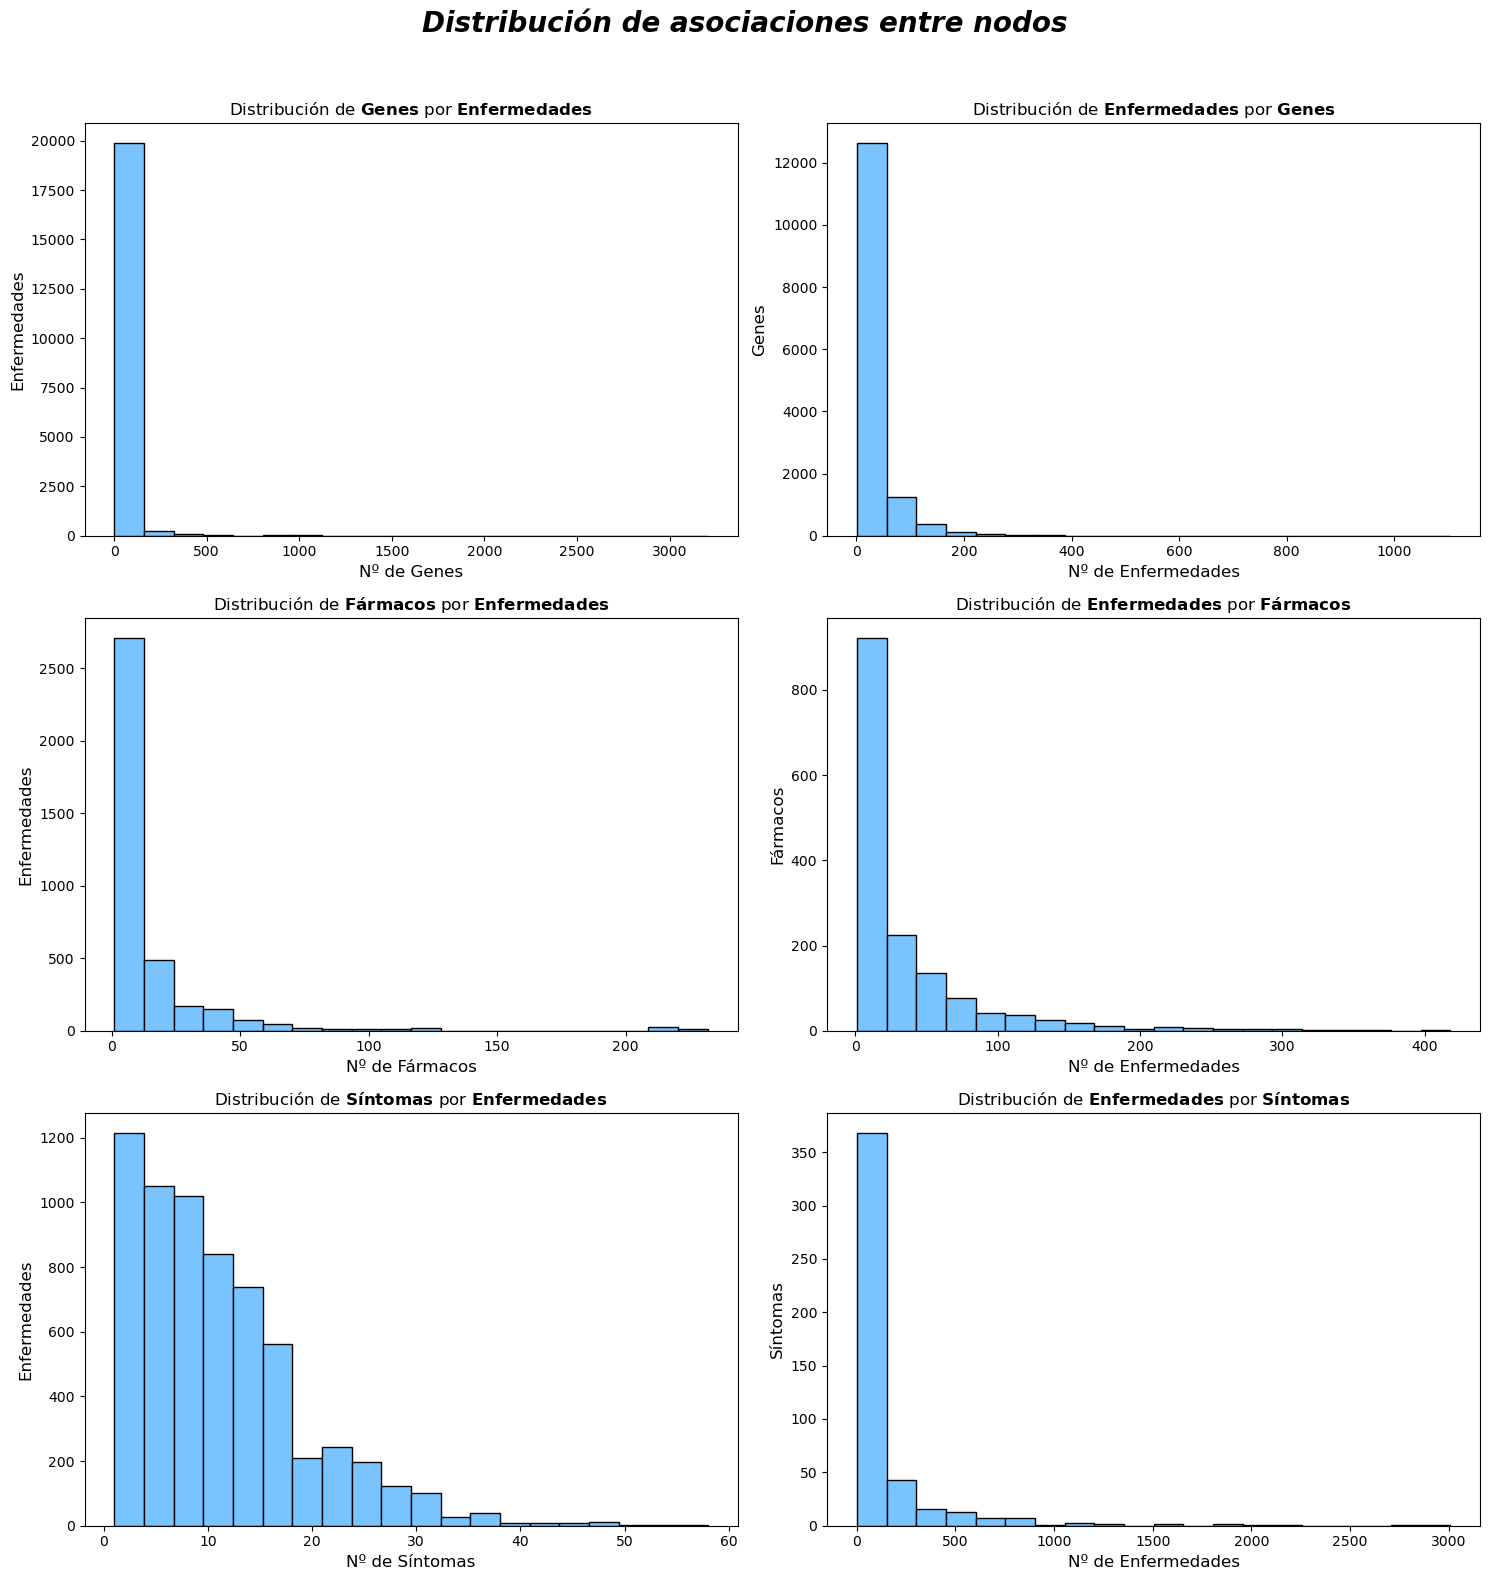

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

funciones_network_science.asociaciones(dis_gen, "dis", "gen", "Enfermedades", "Genes", axs[0, 0])
funciones_network_science.asociaciones(dis_gen, "gen", "dis", "Genes", "Enfermedades", axs[0, 1])

funciones_network_science.asociaciones(dis_dru_the, "dis", "dru", "Enfermedades", "Fármacos", axs[1, 0])
funciones_network_science.asociaciones(dis_dru_the, "dru", "dis", "Fármacos", "Enfermedades", axs[1, 1])

funciones_network_science.asociaciones(dse_sym_limpio, "dse", "sym", "Enfermedades", "Síntomas", axs[2, 0])
funciones_network_science.asociaciones(dse_sym_limpio, "sym", "dse", "Síntomas", "Enfermedades", axs[2, 1])

# Ajustar diseño y mostrar la figura
plt.tight_layout()

# Añado título
plt.suptitle("Distribución de asociaciones entre nodos", fontsize=20, y=1.05, fontweight='bold', style='italic')


plt.show()


### Métricas

##### 1. Grado de los nodos

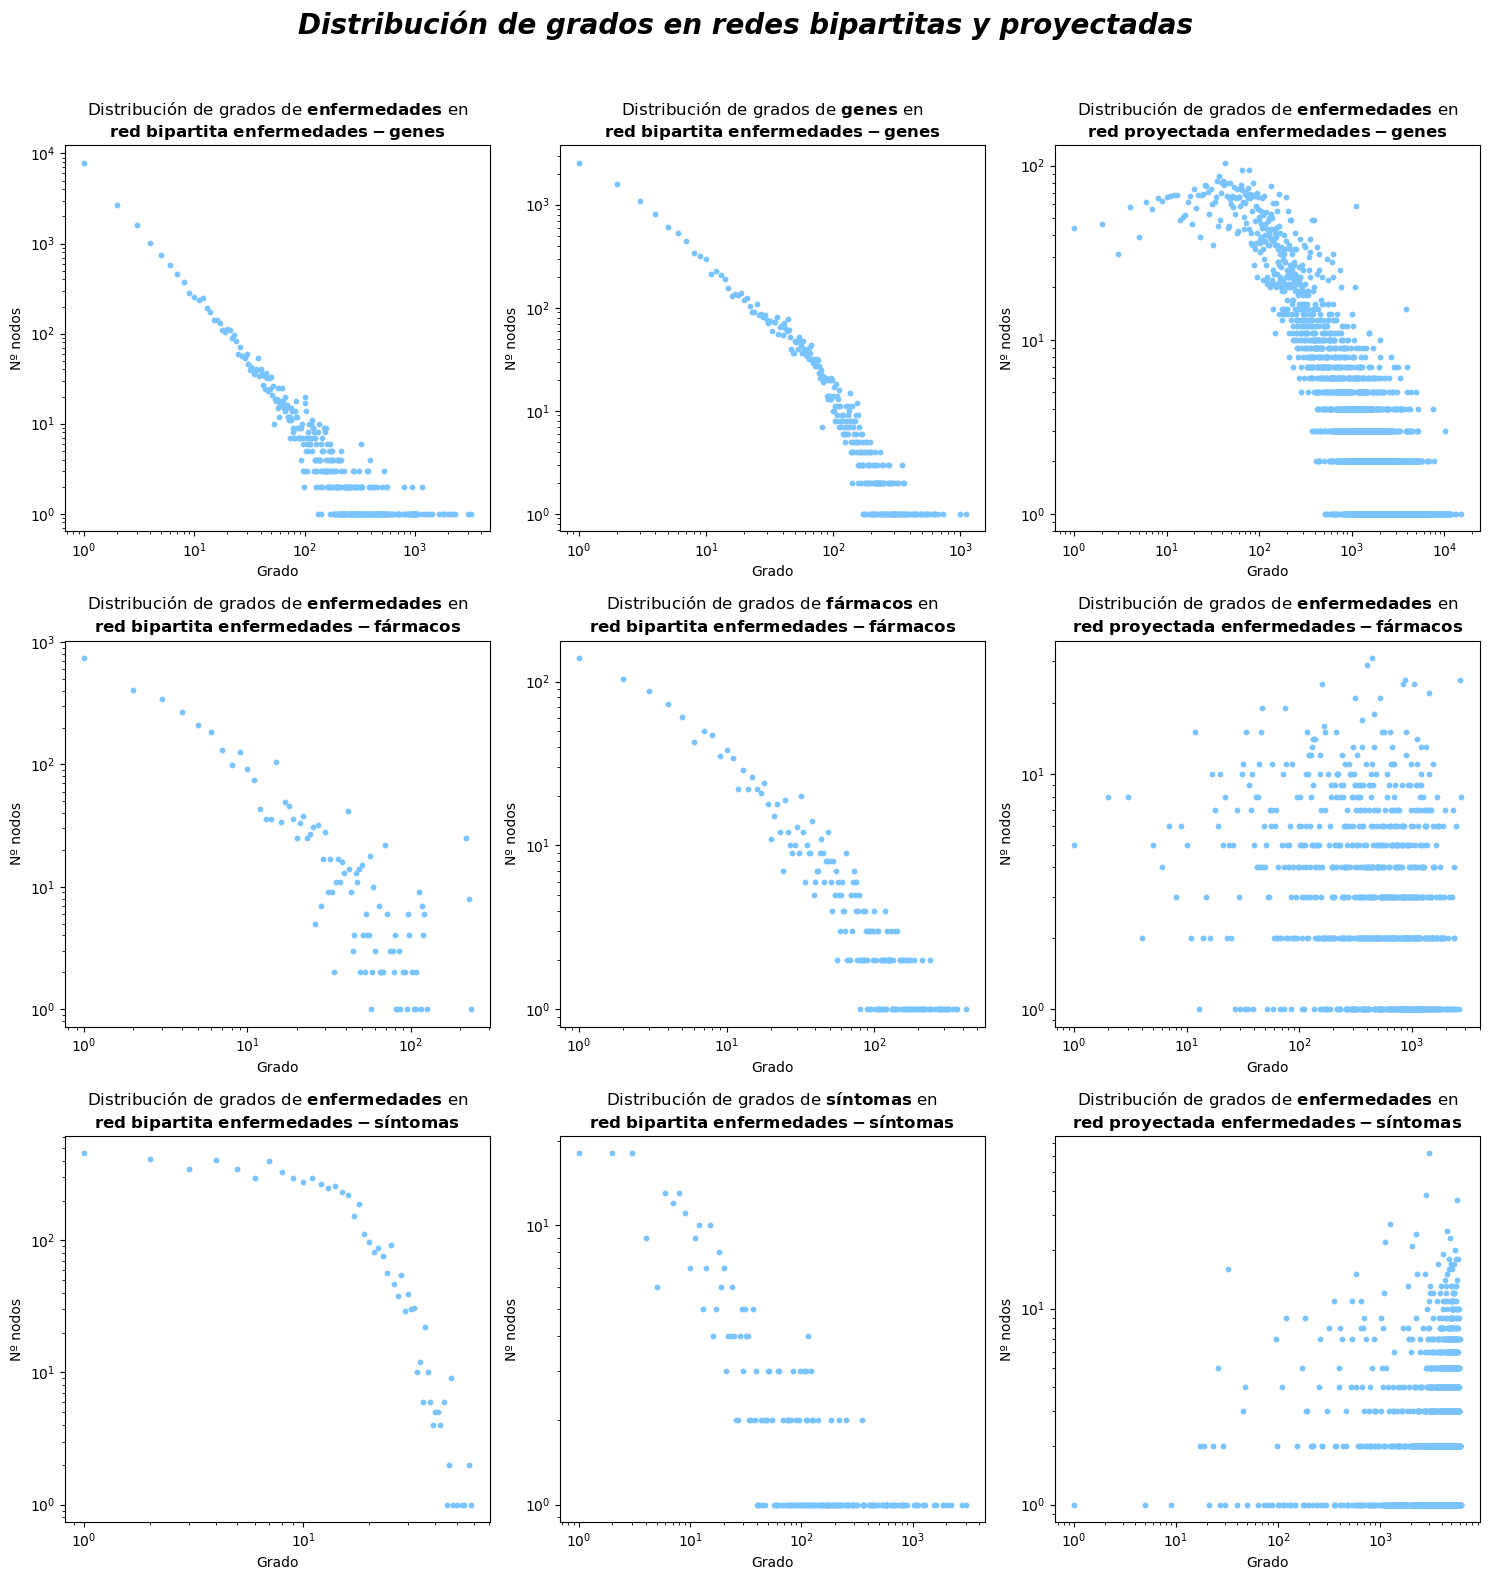

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

funciones_network_science.degree_bip(G_dis_gen, dis_gen, "enfermedades-genes", "genes", axs[0, 0], axs[0, 1])
funciones_network_science.degree_proj(G_dis_gen_proj, "enfermedades-genes", axs[0, 2])

funciones_network_science.degree_bip(G_dis_dru, dis_dru_the, "enfermedades-fármacos", "fármacos", axs[1, 0], axs[1, 1])
funciones_network_science.degree_proj(G_dis_dru_proj, "enfermedades-fármacos", axs[1, 2])

funciones_network_science.degree_bip(G_dse_sym, dse_sym_limpio, "enfermedades-síntomas", "síntomas", axs[2, 0], axs[2, 1])
funciones_network_science.degree_proj(G_dse_sym_proj, "enfermedades-síntomas", axs[2, 2])

# Ajustar diseño y mostrar la figura
plt.tight_layout()

#Añado título
plt.suptitle("Distribución de grados en redes bipartitas y proyectadas", fontsize=20, y=1.05, fontweight='bold', style='italic')

plt.savefig('grados.svg', dpi=300, format='svg', bbox_inches='tight')

plt.show()

##### 2. Average Shortest Path Length

2.1 Distribución de Average SPLs en redes bipartitas

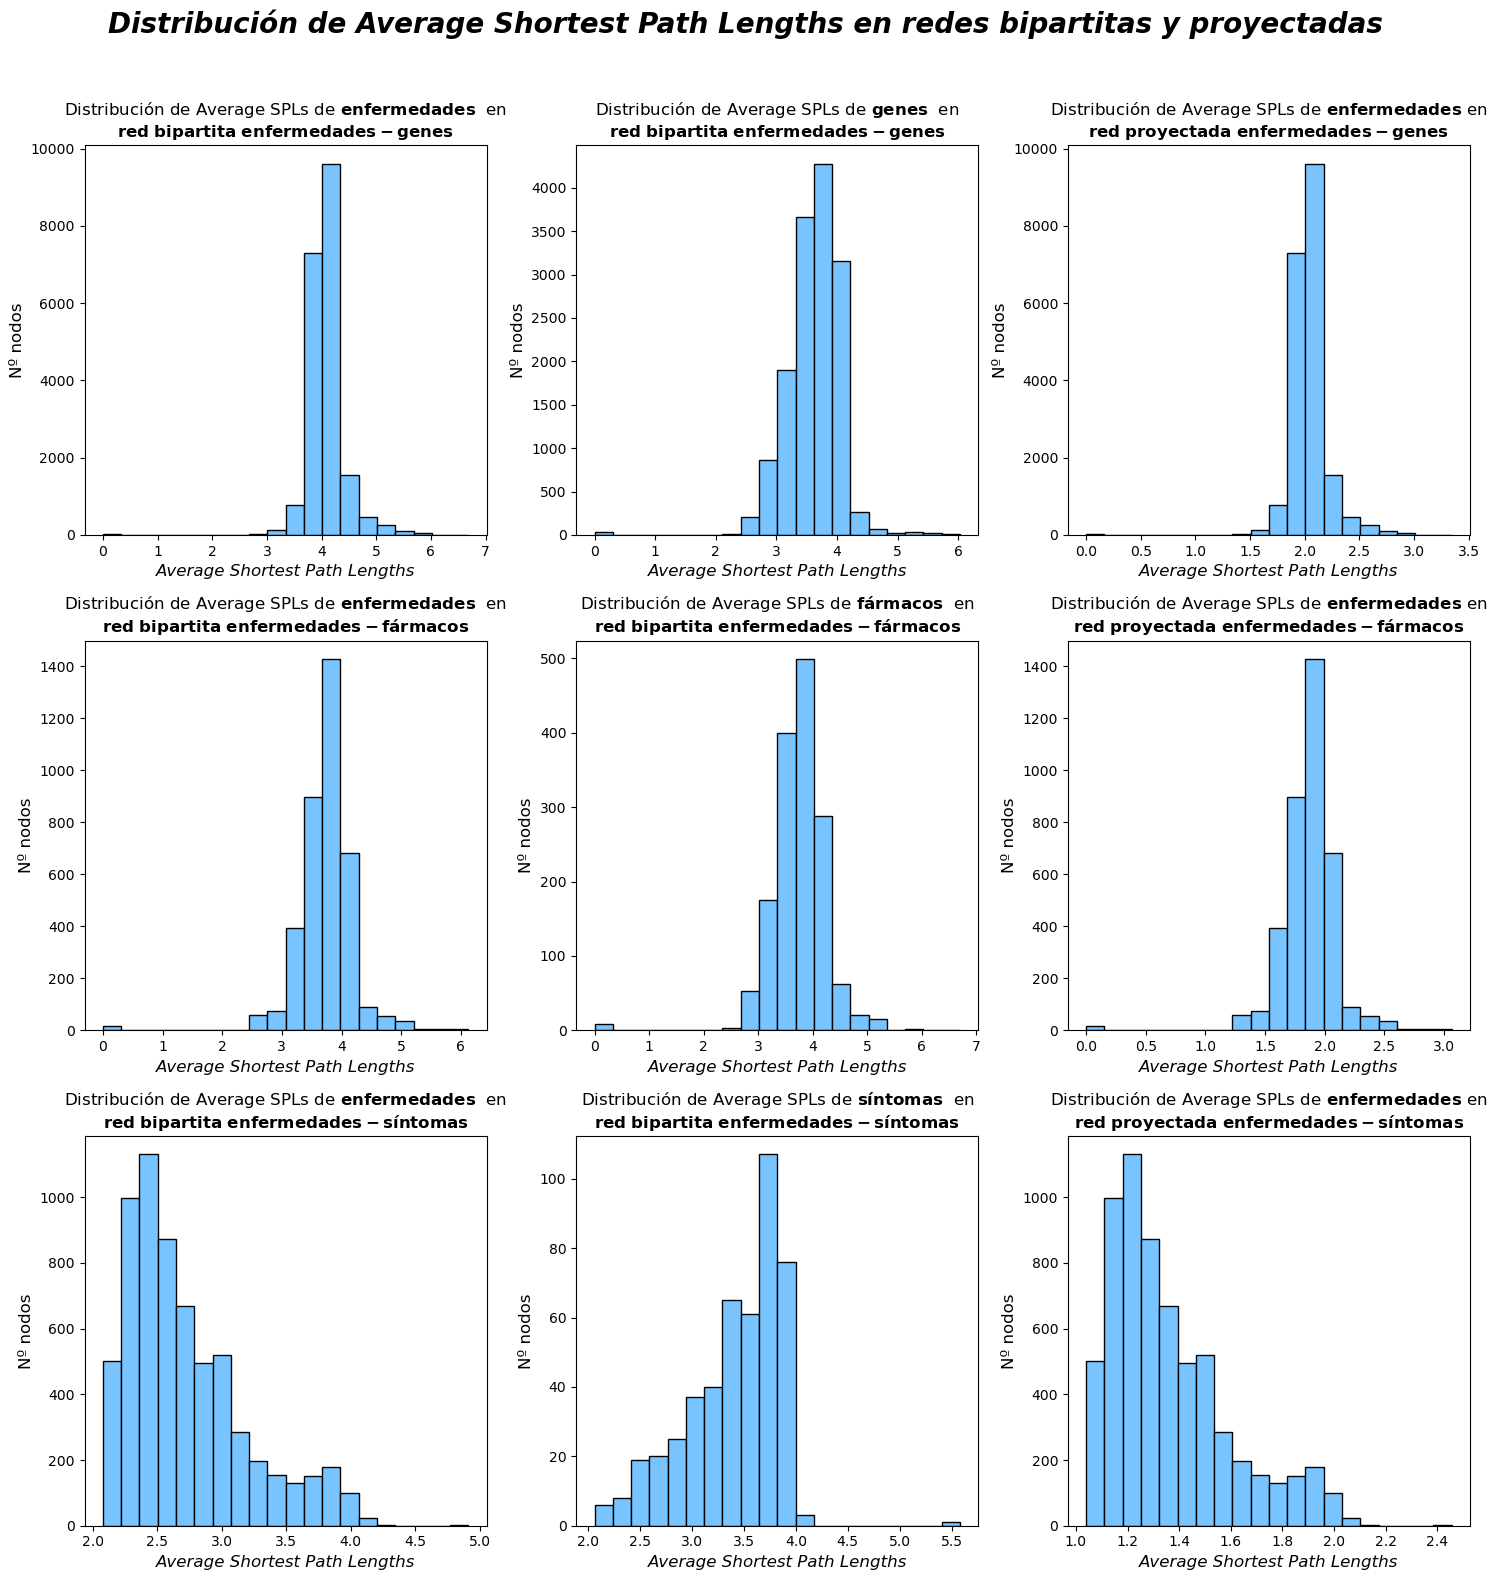

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

funciones_network_science.average_spl(spl_enf_dis_gen, "enfermedades-genes", "enfermedades", axs[0,0], bipartita = True)
funciones_network_science.average_spl(spl_gen_dis_gen, "enfermedades-genes", "genes", axs[0,1], bipartita = True)
funciones_network_science.average_spl(spl_dis_gen_proj, "enfermedades-genes", "enfermedades", axs[0,2], bipartita = False)

funciones_network_science.average_spl(spl_enf_dis_dru, "enfermedades-fármacos", "enfermedades", axs[1,0], bipartita = True)
funciones_network_science.average_spl(spl_dru_dis_dru, "enfermedades-fármacos", "fármacos", axs[1,1], bipartita = True)
funciones_network_science.average_spl(spl_dis_dru_proj, "enfermedades-fármacos", "enfermedades", axs[1,2], bipartita = False)

funciones_network_science.average_spl(spl_enf_dse_sym, "enfermedades-síntomas", "enfermedades", axs[2,0], bipartita = True)
funciones_network_science.average_spl(spl_sym_dse_sym, "enfermedades-síntomas", "síntomas", axs[2,1], bipartita = True)
funciones_network_science.average_spl(spl_dse_sym_proj, "enfermedades-síntomas", "enfermedades", axs[2,2], bipartita = False)



# Ajustar diseño y mostrar la figura
plt.tight_layout()

#Añado título
plt.suptitle("Distribución de Average Shortest Path Lengths en redes bipartitas y proyectadas", fontsize=20, y=1.05, fontweight='bold', style='italic')

plt.show()

##### 3. Transitividad

In [80]:
#Transitividad en redes bipartitas
transitivity_dis_gen = nx.transitivity(G_dis_gen)
transitivity_dis_dru = nx.transitivity(G_dis_dru)
transitivity_dse_sym = nx.transitivity(G_dse_sym)

In [81]:
print(transitivity_dis_gen)
print(transitivity_dis_dru)
print(transitivity_dse_sym)

0
0
0


In [55]:
#Transitividad en redes proyectadas
transitivity_dis_gen_proj = nx.transitivity(G_dis_gen_proj)
transitivity_dis_dru_proj = nx.transitivity(G_dis_dru_proj)
transitivity_dse_sym_proj = nx.transitivity(G_dse_sym_proj)

In [56]:
print(transitivity_dis_gen_proj)
print(transitivity_dis_dru_proj)
print(transitivity_dse_sym_proj)

0.3323717072252667
0.48114198999548424
0.8113795328022746


##### 4. Largest Connected Component

In [56]:
#Redes bipartitas
lcc_G_dis_gen = max(nx.connected_components(G_dis_gen), key=len)
lcc_G_dis_dru = max(nx.connected_components(G_dis_dru), key=len)
lcc_G_dse_sym = max(nx.connected_components(G_dse_sym), key=len)

In [57]:
print(len(lcc_G_dis_gen))
print(len(lcc_G_dis_dru))
print(len(lcc_G_dse_sym))

34736
5250
6876


In [58]:
#Redes proyectadas
lcc_G_dis_gen_proj = max(nx.connected_components(G_dis_gen_proj), key=len)
lcc_G_dis_dru_proj = max(nx.connected_components(G_dis_dru_proj), key=len)
lcc_G_dse_sym_proj = max(nx.connected_components(G_dse_sym_proj), key=len)

In [59]:
print(len(lcc_G_dis_gen_proj))
print(len(lcc_G_dis_dru_proj))
print(len(lcc_G_dse_sym_proj))

20250
3731
6408


##### 5. Centralidad

5.1 Centralidad de intermediación

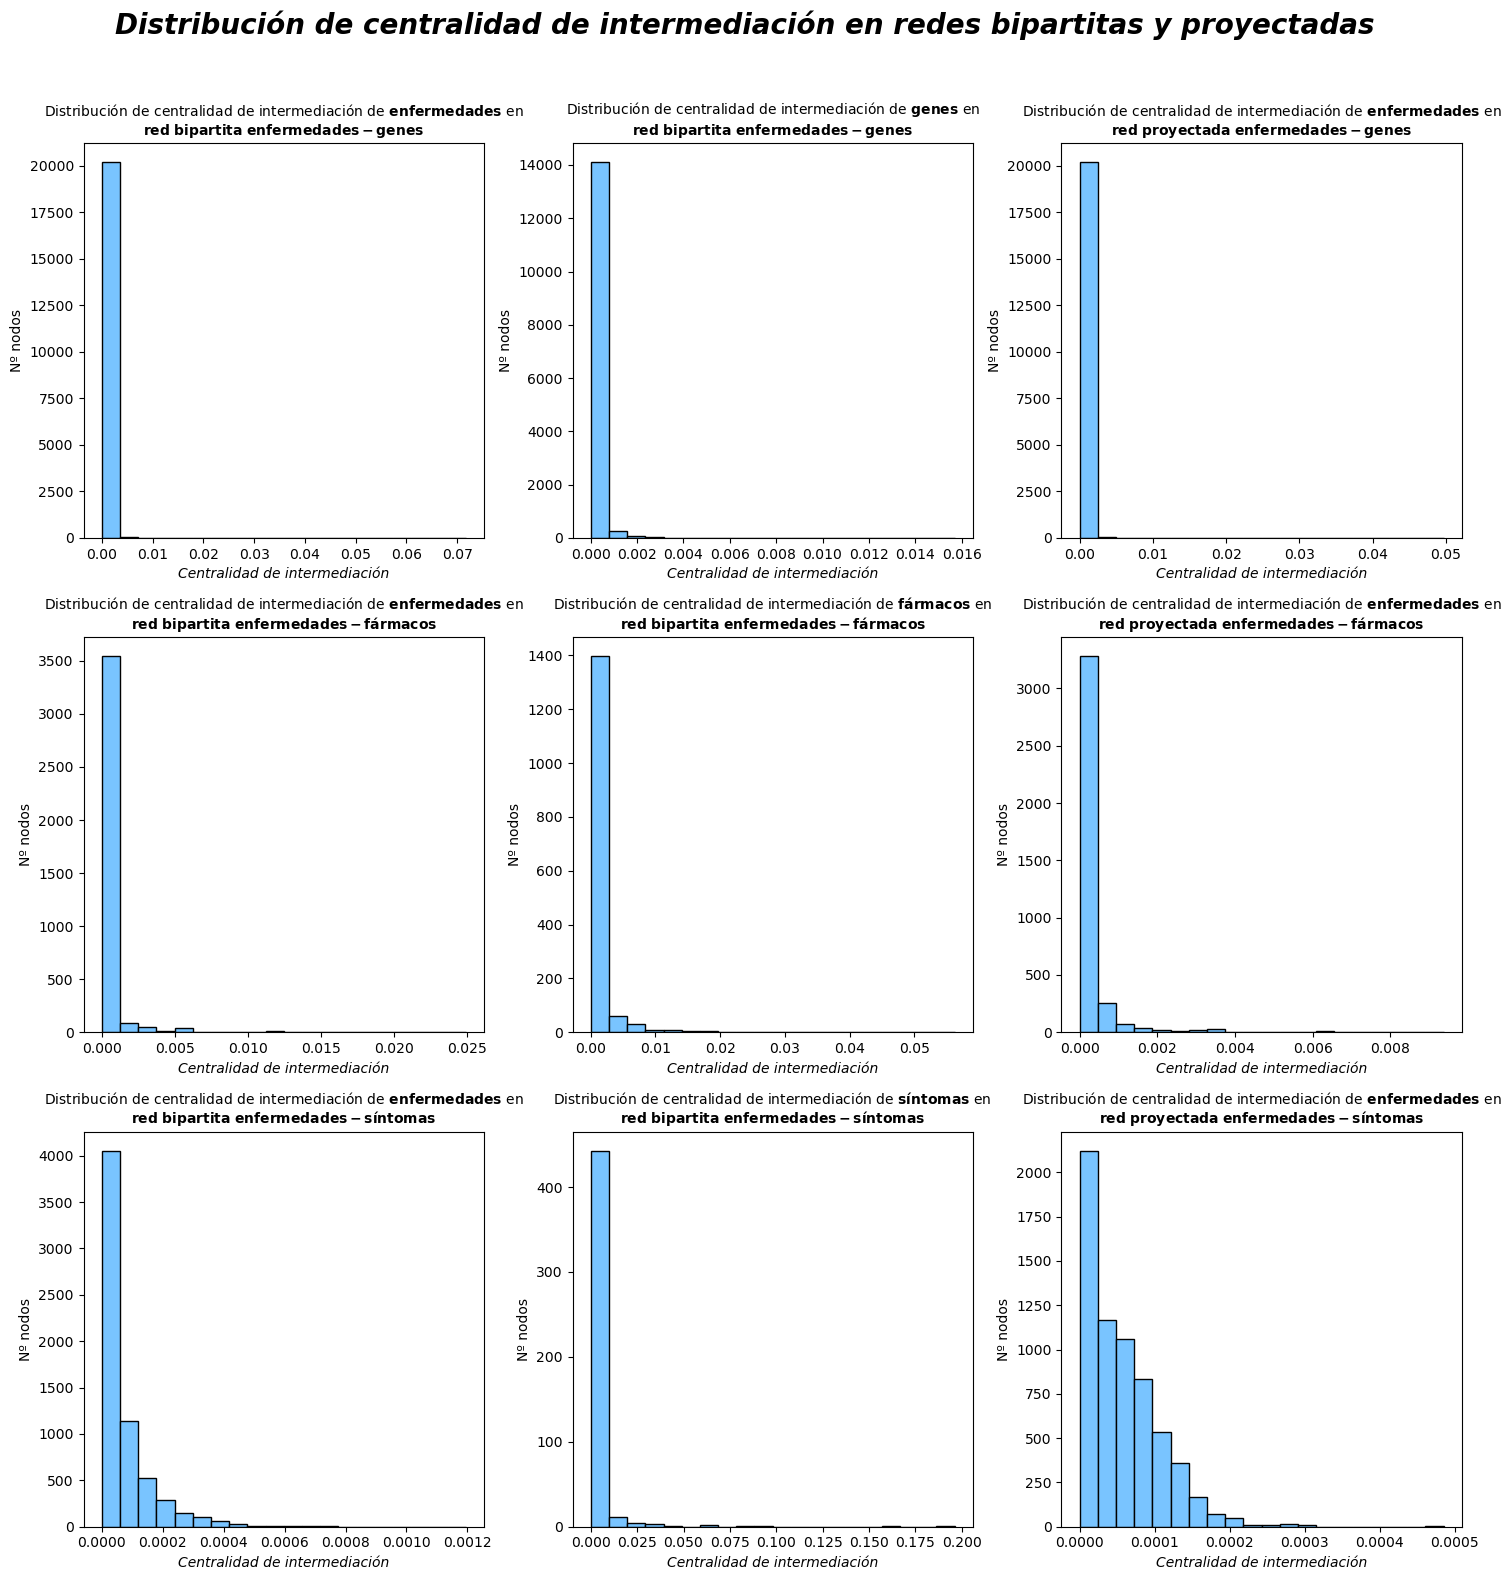

In [22]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

funciones_network_science.centrality_b_bip(G_dis_gen, dis_gen, "enfermedades-genes", "genes", axs[0, 0], axs[0, 1])
funciones_network_science.centrality_b_proj(G_dis_gen_proj, "enfermedades-genes", axs[0, 2])

funciones_network_science.centrality_b_bip(G_dis_dru, dis_dru_the, "enfermedades-fármacos", "fármacos", axs[1, 0], axs[1, 1])
funciones_network_science.centrality_b_proj(G_dis_dru_proj, "enfermedades-fármacos", axs[1, 2])

funciones_network_science.centrality_b_bip(G_dse_sym, dse_sym_limpio, "enfermedades-síntomas", "síntomas", axs[2, 0], axs[2, 1])
funciones_network_science.centrality_b_proj(G_dse_sym_proj, "enfermedades-síntomas", axs[2, 2])

# Ajustar diseño y mostrar la figura
plt.tight_layout()

#Añado título
plt.suptitle("Distribución de centralidad de intermediación en redes bipartitas y proyectadas", fontsize=20, y=1.05, fontweight='bold', style='italic')


plt.show()

5.2 Centralidad de cercanía

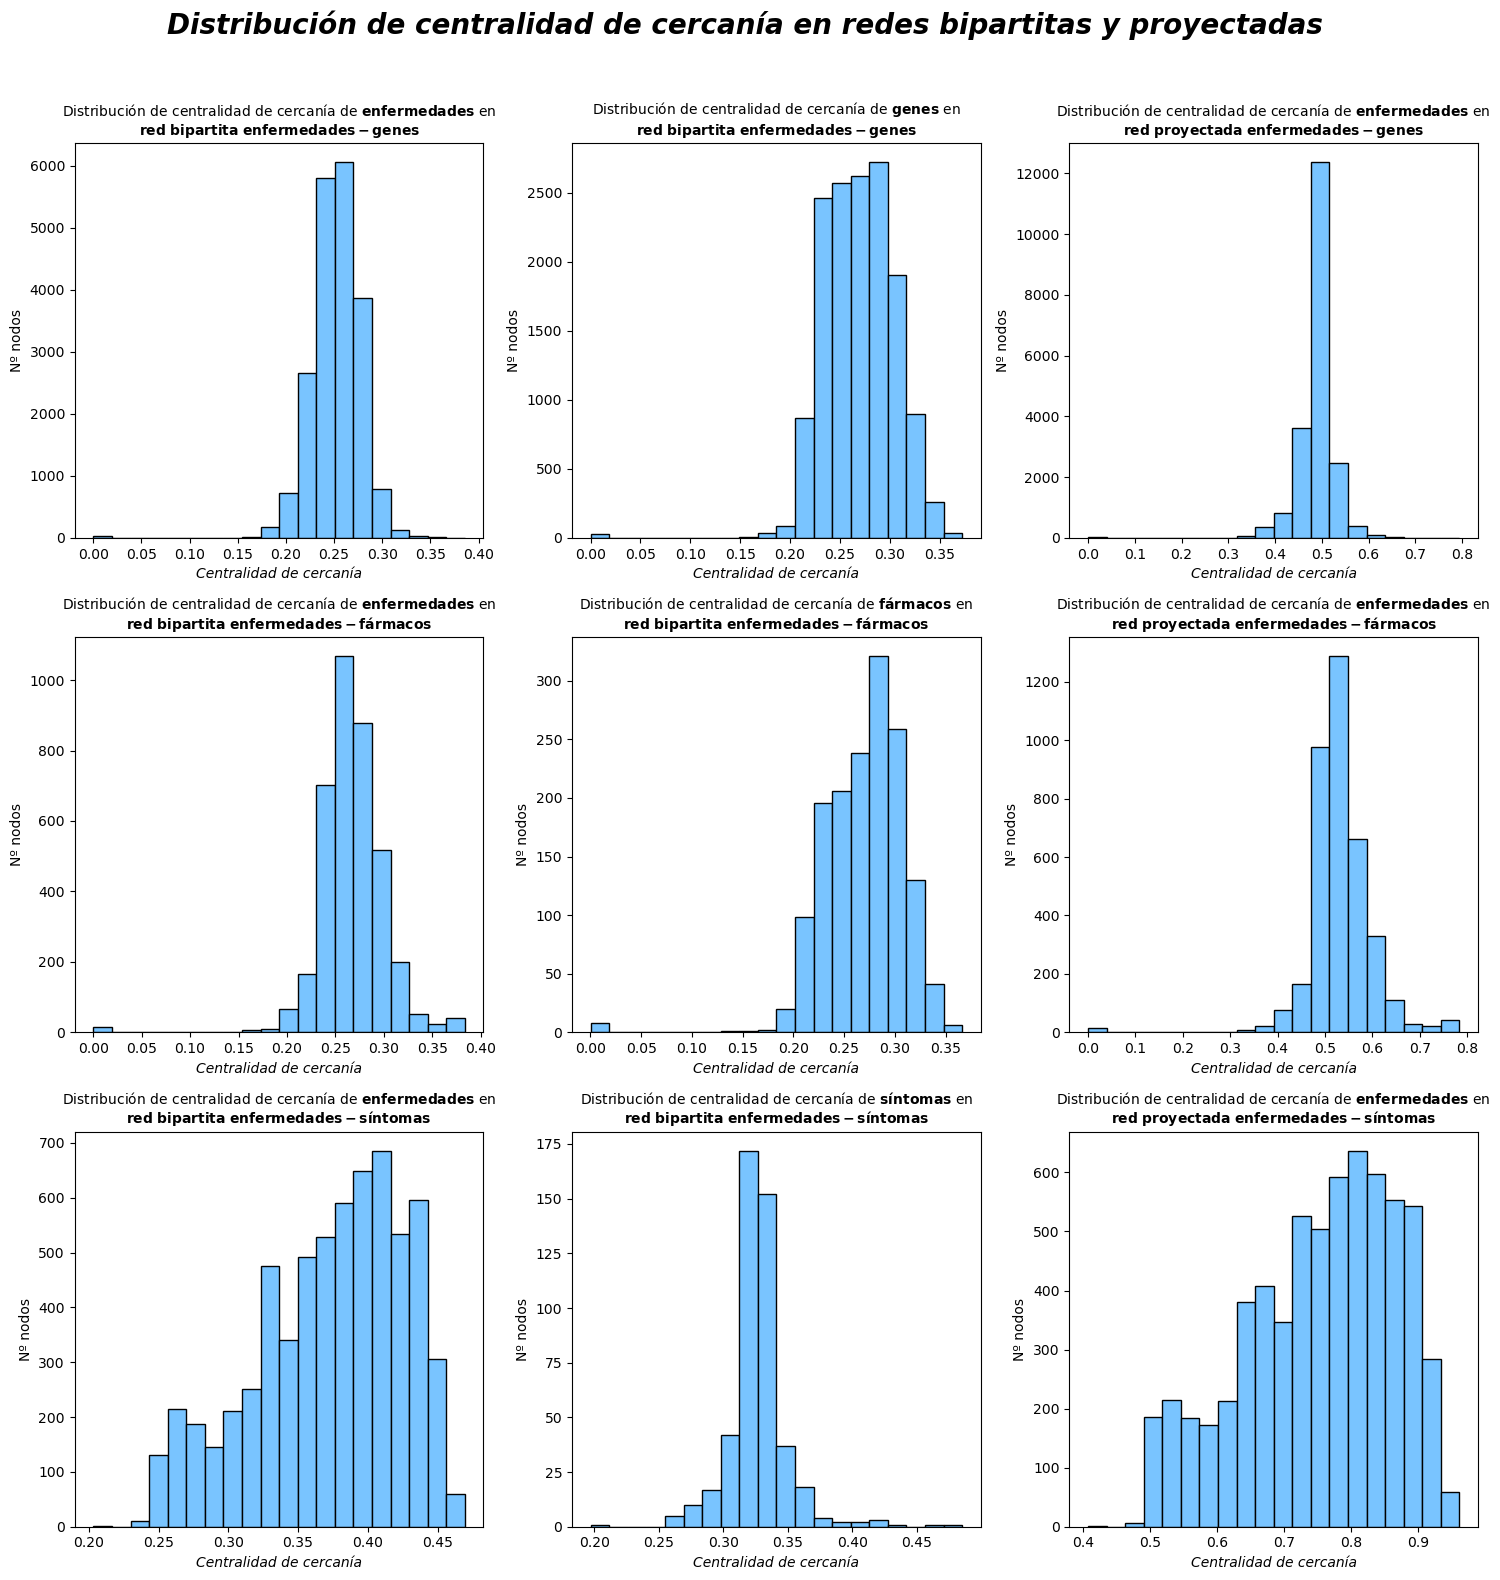

In [23]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

funciones_network_science.centrality_c_bip(G_dis_gen, dis_gen, "enfermedades-genes", "genes", axs[0, 0], axs[0, 1])
funciones_network_science.centrality_c_proj(G_dis_gen_proj, "enfermedades-genes", axs[0, 2])

funciones_network_science.centrality_c_bip(G_dis_dru, dis_dru_the, "enfermedades-fármacos", "fármacos", axs[1, 0], axs[1, 1])
funciones_network_science.centrality_c_proj(G_dis_dru_proj, "enfermedades-fármacos", axs[1, 2])

funciones_network_science.centrality_c_bip(G_dse_sym, dse_sym_limpio, "enfermedades-síntomas", "síntomas", axs[2, 0], axs[2, 1])
funciones_network_science.centrality_c_proj(G_dse_sym_proj, "enfermedades-síntomas", axs[2, 2])

# Ajustar diseño y mostrar la figura
plt.tight_layout()

#Añado título
plt.suptitle("Distribución de centralidad de cercanía en redes bipartitas y proyectadas", fontsize=20, y=1.05, fontweight='bold', style='italic')


plt.show()